<a href="https://colab.research.google.com/github/alubillijyaneswarrao-creator/MachineLearningModels/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
#Data Collection
data=pd.read_csv('pacific.csv')
print(data.head())
print(data.info())
print(data.describe())


         ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0        

In [ ]:
#data Manipulation
data_status=pd.Categorical(data.Status)
data['Status']=data_status.codes

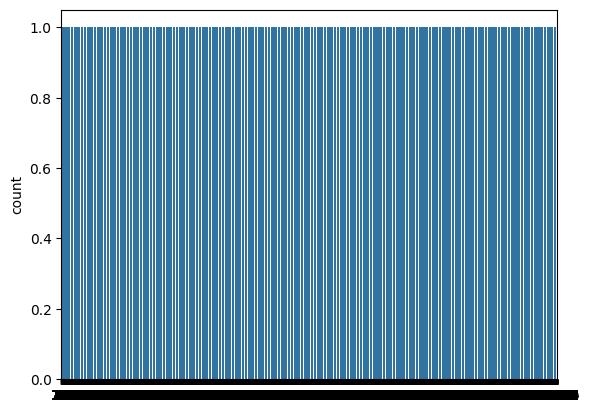

In [ ]:
#Checking class frequencies
def convert_latitude(lat_str):
    if isinstance(lat_str, str):
        if 'N' in lat_str:
            return float(lat_str.replace('N', ''))
        elif 'S' in lat_str:
            return -float(lat_str.replace('S', ''))
    return float(lat_str)

def convert_longitude(lon_str):
    if isinstance(lon_str, str):
        if 'E' in lon_str:
            return float(lon_str.replace('E', ''))
        elif 'W' in lon_str:
            return -float(lon_str.replace('W', ''))
    return float(lon_str)

data['Latitude'] = data['Latitude'].apply(convert_latitude)
data['Longitude'] = data['Longitude'].apply(convert_longitude)
sns.countplot(data['Status'],label='Count')
plt.show()

In [ ]:
#Data Cleaning
pred_columns=data[:]
pred_columns.drop(['Status'],axis=1,inplace=True)
pred_columns.drop(['ID'],axis=1,inplace=True)
pred_columns.drop(['Name'],axis=1,inplace=True)
pred_columns.drop(['Event'],axis=1,inplace=True)
pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['Latitude'],axis=1,inplace=True)
pred_columns.drop(['Date'],axis=1,inplace=True)
pred_columns.drop(['Time'],axis=1,inplace=True)
prediction_var=pred_columns.columns
print(list(prediction_var))

['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


/tmp/ipython-input-912047474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_columns.drop(['Status'],axis=1,inplace=True)
/tmp/ipython-input-912047474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_columns.drop(['ID'],axis=1,inplace=True)
/tmp/ipython-input-912047474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_columns.drop(['Name'],axis=1,inplace=True)
/tmp/ipython-input-912047474.py:6: SettingWithCopyWa

In [ ]:
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [ ]:
#Creating Response and Target Variable
train_x=train[prediction_var]
train_y=train['Status']
test_x=test[prediction_var]
test_y=test['Status']

In [ ]:
#Data Modeling
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
y_pred_gnb=gnb.fit(train_x,train_y).predict(test_x)

In [ ]:
#Confusion Matrix
cnf_matrix_gnb=metrics.confusion_matrix(test_y,y_pred_gnb)
print(cnf_matrix_gnb)

[[  65    0    0    0    0    0    2    0    0    0    0]
 [   0   52    0    0    0    0    0    0    0    0    0]
 [   3   25    0    0    2    0    2    0    0    0    0]
 [   0 1654    0  371    0    0    0    0    1    0    0]
 [ 479   38    0    0    1    3   19    7    0    0    0]
 [   2    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    2    0    0    0    0]
 [   0    0    0    0    0    0    0    2    0    0    0]
 [   0    0    0    1    0    0    0    0    2    0    0]
 [ 282 1768    0    0    0    0   68    1    0    0    0]
 [   0 2385    0    0    0   61    0  530    0    0   13]]


In [ ]:
#Accuracy Prediction
print("Number of mislabeled points out of a total %d points: %d" %
      (data.shape[0], (test_y != y_pred_gnb).sum()))


Number of mislabeled points out of a total 26137 points: 7334


In [ ]:
#Accuracy Score
correct = (test_y != y_pred_gnb).sum()
total = len(data)
print(correct)
print(total)

accuracy = (total-correct) / total
print(f"Total Accuracy: {accuracy * 100:.2f}%")


7334
26137
Total Accuracy: 71.94%
